<a href="https://colab.research.google.com/github/pdrzxzz/Projeto-2-Estat-stica/blob/main/An%C3%A1lise%20Popula%C3%A7%C3%A3o%20Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/datasets/dataanalyst001/world-population-growth-rate-by-cities-2024
#https://drive.google.com/file/d/1nb2DICjXL8mxBDKb4RuAvooIrMXYUfhp/view?usp=drive_link

In [ ]:
if(!require("dplyr")) install.packages('dplyr') ; if(!require("ggplot2")) install.packages('ggplot2'); if(!require("plotly")) install.packages('plotly'); if(!require("nortest")) install.packages('nortest')

In [ ]:
library(dplyr); library(ggplot2); library(plotly); library(nortest)

---

In [ ]:
data = read.csv('World-pop.csv')
head(data)

,City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,Tokyo,Japan,Asia,37115035,37194105,-0.0021
2,Delhi,India,Asia,33807403,32941309,0.0263
3,Shanghai,China,Asia,29867918,29210808,0.0225
4,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
5,Sao Paulo,Brazil,South America,22806704,22619736,0.0083
6,Cairo,Egypt,Africa,22623874,22183201,0.0199


In [ ]:
#Transformando a taxa de crescimento para porcentagem
data$Growth.Rate = data$Growth.Rate * 100

In [ ]:
head(data)

,City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,Tokyo,Japan,Asia,37115035,37194105,-0.21
2,Delhi,India,Asia,33807403,32941309,2.63
3,Shanghai,China,Asia,29867918,29210808,2.25
4,Dhaka,Bangladesh,Asia,23935652,23209616,3.13
5,Sao Paulo,Brazil,South America,22806704,22619736,0.83
6,Cairo,Egypt,Africa,22623874,22183201,1.99


In [ ]:
table(data$Continent)


                     Africa          Asia        Europe North America 
           11           106           500            53            63 
       Oceana       Oceania South America 
            2             4            62 

In [ ]:
#Corrigindo erro de ortografia, oceana -> oceania.
data$Continent <- ifelse(data$Continent == "Oceana", "Oceania", data$Continent)

In [ ]:
table(data$Continent)


                     Africa          Asia        Europe North America 
           11           106           500            53            63 
      Oceania South America 
            6            62 

In [ ]:
#Removendo valores missing
data <- data %>% filter(Continent != "")
table(data$Continent)


       Africa          Asia        Europe North America       Oceania 
          106           500            53            63             6 
South America 
           62 

---

In [ ]:
summary(data)

     City             Country           Continent         Population..2024. 
 Length:790         Length:790         Length:790         Min.   :  750036  
 Class :character   Class :character   Class :character   1st Qu.:  992648  
 Mode  :character   Mode  :character   Mode  :character   Median : 1379998  
                                                          Mean   : 2665356  
                                                          3rd Qu.: 2550904  
                                                          Max.   :37115035  
 Population..2023.   Growth.Rate    
 Min.   :  722836   Min.   :-2.490  
 1st Qu.:  970916   1st Qu.: 1.242  
 Median : 1364431   Median : 1.975  
 Mean   : 2615341   Mean   : 2.008  
 3rd Qu.: 2501436   3rd Qu.: 2.650  
 Max.   :37194105   Max.   : 5.820  

In [ ]:
#DESCREVENDO AS VARIÁVEIS

#City -> Qualitativa Nominal

#Country -> Qualitativa Nominal

#Continent -> Qualitativa Nominal

#Population 2023/2024 -> Quantitativa Discreta

#Growth Rate -> Quantitativa Contínua

---

In [ ]:
#CALCULANDO MEDIDAS

In [ ]:
#Calculando médias
mean(data$Population..2023.)
mean(data$Population..2024.)
mean(data$Growth.Rate)

[1] 2615341

[1] 2665356

[1] 2.00781

In [ ]:
#A ordem de crescimento populacional de 2023 para 2024 foi, em média, aproximadamente 2%

In [ ]:
#Calculando medianas
median(data$Population..2023.)
median(data$Population..2024.)
median(data$Growth.Rate)

[1] 1364431

[1] 1379998

[1] 1.975

In [ ]:
#Calculando desvio padrão
sd(data$Population..2023.)
sd(data$Population..2024.)
sd(data$Growth.Rate)

[1] 3683668

[1] 3746048

[1] 1.214472

In [ ]:
#Calculando variância
var(data$Population..2023.)
var(data$Population..2024.)
var(data$Growth.Rate)

[1] 1.356941e+13

[1] 1.403288e+13

[1] 1.474942

---

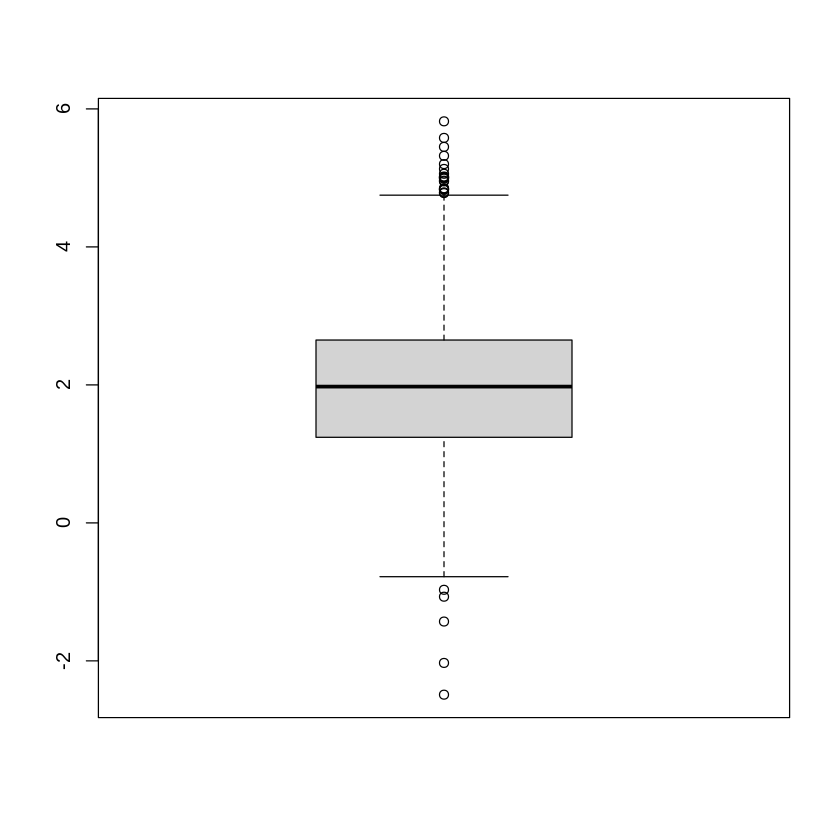

In [ ]:
boxplot(data$Growth.Rate)

In [ ]:
#É possível observar a presença de alguns outliers, vamos analisar onde estão localizadas essas cidades fora da curva.
outliers = boxplot.stats(data$Growth.Rate)$out
outliers

[1]  4.96 -2.49  5.32  4.85 -0.97 -1.43  5.20 -1.07  4.83  5.13  4.95  4.78
[13]  4.99  5.82  4.83  5.00  5.02  4.79 -2.03  5.58  5.45  5.01  5.01  5.06
[25]  4.84

In [ ]:
#Filtrando os outliers
non_negative_outliers = c()
negative_outliers = c()
for(num in outliers){
  if(num >= 0){
    non_negative_outliers <- c(non_negative_outliers, num)
  }
  else{
    negative_outliers <- c(negative_outliers, num)
  }
}
non_negative_outliers
negative_outliers

[1] 4.96 5.32 4.85 5.20 4.83 5.13 4.95 4.78 4.99 5.82 4.83 5.00 5.02 4.79 5.58
[16] 5.45 5.01 5.01 5.06 4.84

[1] -2.49 -0.97 -1.43 -1.07 -2.03

In [ ]:
#Cidades com outliers negativos
outliers_rows = which(data$Growth.Rate %in% negative_outliers)
data[outliers_rows, ]

,City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
49,New York,United States,North America,7931147,8133522,-2.49
130,Los Angeles,United States,North America,3748640,3785439,-0.97
196,Chicago,United States,North America,2590002,2627520,-1.43
351,Philadelphia,United States,North America,1533916,1550587,-1.07
637,San Jose,United States,North America,932636,951934,-2.03


In [ ]:
#Cidades com outliers não negativos
outliers_rows = which(data$Growth.Rate %in% non_negative_outliers)
data[outliers_rows, ]

,City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
48,Dar Es Salaam,Tanzania,Africa,8161231,7775865,4.96
114,Kampala,Uganda,Africa,4050826,3846102,5.32
117,Abuja,Nigeria,Africa,4025735,3839646,4.85
223,Aleppo,Syria,Asia,2317650,2203025,5.20
391,Uyo,Nigeria,Africa,1393453,1329284,4.83
398,Mwanza,Tanzania,Africa,1378014,1310754,5.13
423,Abomey Calavi,Benin,Africa,1314916,1252890,4.95
429,Bukavu,DR Congo,Africa,1308469,1248783,4.78
430,Nnewi,Nigeria,Africa,1300993,1239186,4.99


In [ ]:
#Podemos perceber somente observando os outliers que algumas cidades na américa do norte possuem a menor taxa de crescimento entre todas observadas
#Além de percebermos que as cidades com maior taxa de crescimento estão na Africa e na Asia.

------

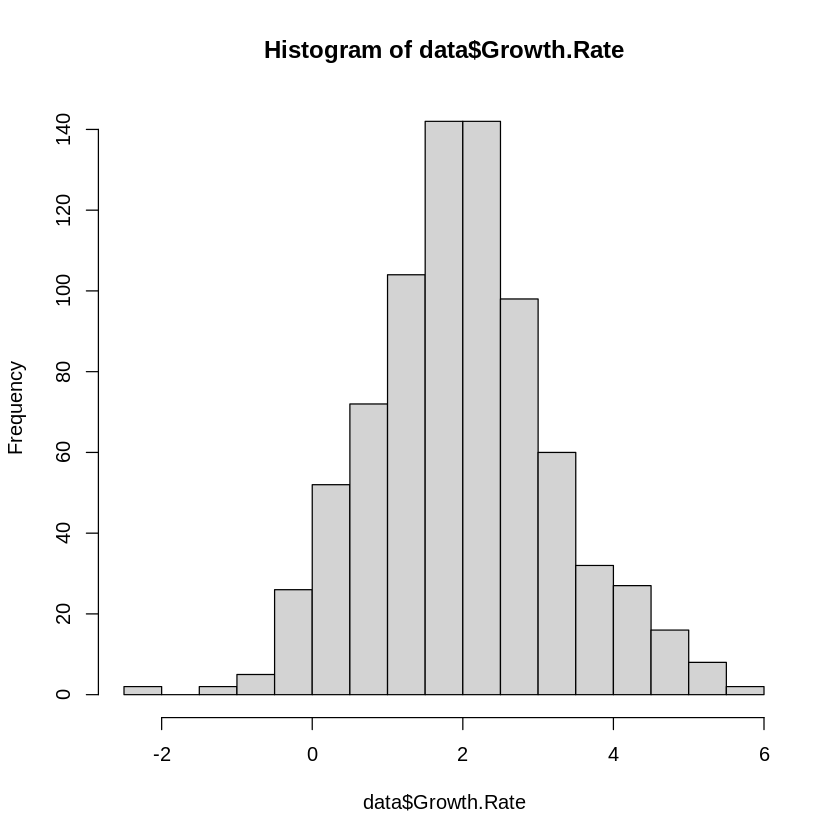

In [ ]:
hist(data$Growth.Rate, breaks=20)

In [ ]:
#Podemos perceber algo semelhante a uma distribuição normal.
#Vamos realizar o teste de normalidade

In [ ]:
ad.test(data$Growth.Rate)


	Anderson-Darling normality test

data:  data$Growth.Rate
A = 1.9341, p-value = 6.198e-05


In [ ]:
#Como o p-value < 0.05, a variável ainda não possui uma distribuição normal.
#Tentarei remover os outliers para ver se ajuda em algo.

In [ ]:
#Pelo processo análogo ao processo de obtenção das cidades outliers, obtemos as cidades não outliers
cleaned_data <- data[which(!data$Growth.Rate %in% non_negative_outliers), ]
head(cleaned_data)

,City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>
1,Tokyo,Japan,Asia,37115035,37194105,-0.21
2,Delhi,India,Asia,33807403,32941309,2.63
3,Shanghai,China,Asia,29867918,29210808,2.25
4,Dhaka,Bangladesh,Asia,23935652,23209616,3.13
5,Sao Paulo,Brazil,South America,22806704,22619736,0.83
6,Cairo,Egypt,Africa,22623874,22183201,1.99


In [ ]:
#Refazendo o teste de normalidade
ad.test(cleaned_data$Growth.Rate)


	Anderson-Darling normality test

data:  cleaned_data$Growth.Rate
A = 0.68548, p-value = 0.07318


In [ ]:
#Como o p-value > 0.05, agora obtemos uma amostra normal.

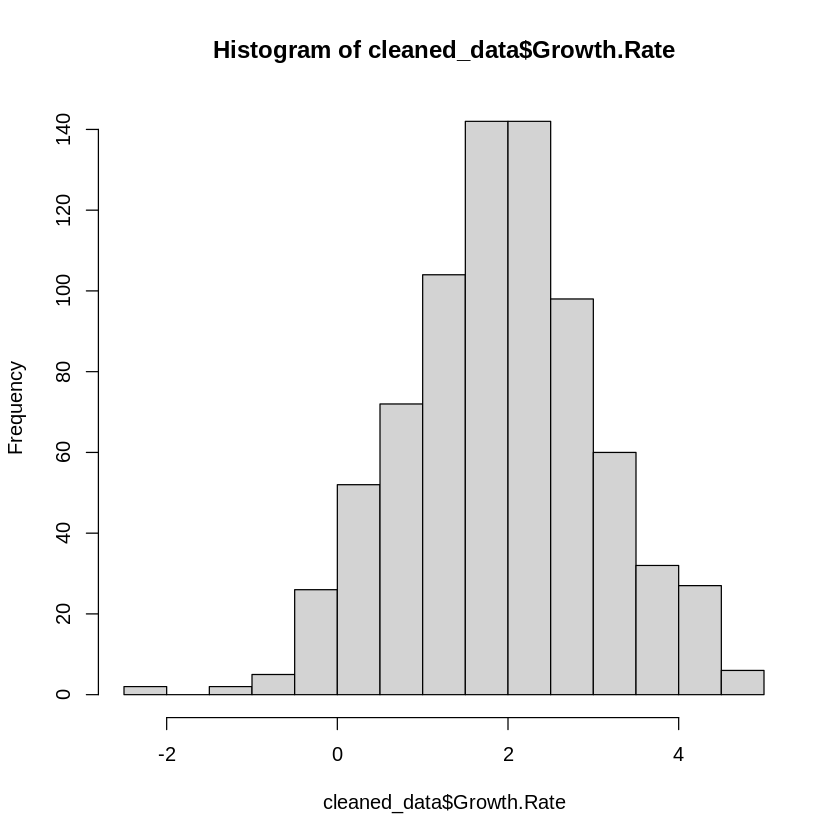

In [ ]:
hist(cleaned_data$Growth.Rate)

---

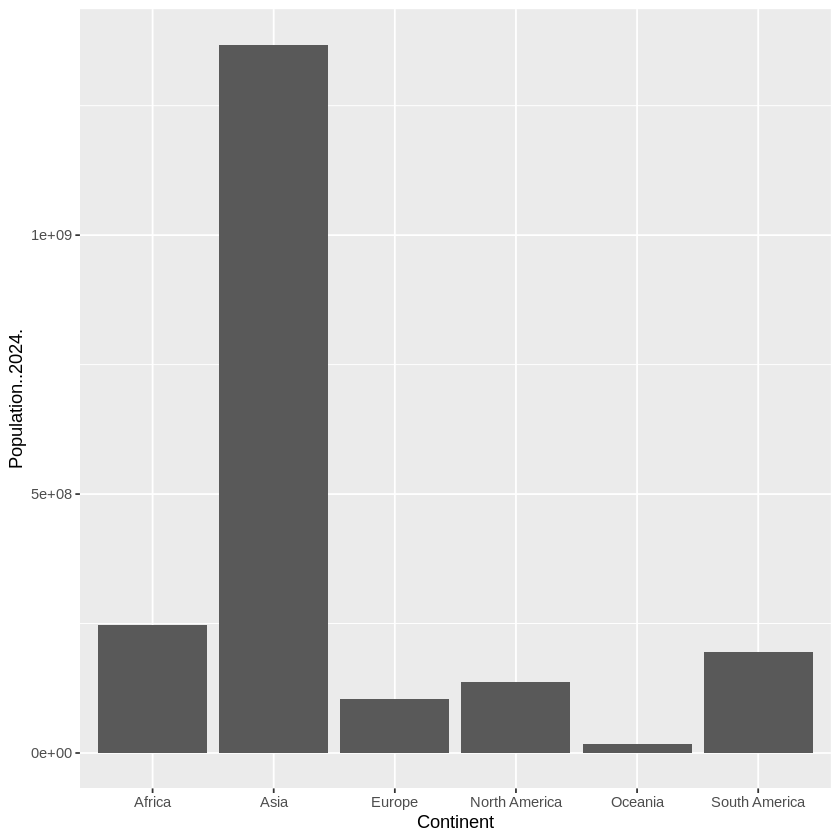

In [ ]:
ggplot(cleaned_data, aes(x=Continent, y=Population..2024.)) + geom_col()

In [ ]:
#Com esse gráfico podemos analisar que a maior parte da população mundial analisada pela nossa base de dados está localizada na Ásia.

In [ ]:
#HIPÓTESE 1

#Hipótese Nula -> A taxa de crescimento não é menor na América em comparação com os outros continentes.
#Hipótese Alternativa -> A taxa de crescimento é menor na América em comparação com os outros continentes.

In [ ]:
american_data <- cleaned_data %>% filter(Continent == "South America" | Continent == "North America")

In [ ]:
non_american_data <- cleaned_data %>% filter(Continent != "South America" & Continent != "North America")

In [ ]:
t.test(non_american_data$Growth.Rate, american_data$Growth.Rate, alternative = "greater")


	Welch Two Sample t-test

data:  non_american_data$Growth.Rate and american_data$Growth.Rate
t = 12.213, df = 236.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8607648       Inf
sample estimates:
mean of x mean of y 
 2.089829  1.094480 


In [ ]:
#Como p-value é menor do que 0.05, é possível rejeitarmos a hipótese nula e aceitarmos a hipótese alternativa com um grau de confiança de 95%.

In [ ]:
#HIPÓTESE 2

#Hipótese Nula -> A taxa de crescimento no Japão não é menor em comparação com os outros países.
#Hipótese Alternativa -> A taxa de crescimento no Japão é menor em comparação com os outros países.

In [ ]:
japan_data <- cleaned_data %>% filter(Country == "Japan")
japan_data

City,Country,Continent,Population..2024.,Population..2023.,Growth.Rate
<chr>,<chr>,<chr>,<int>,<int>,<dbl>
Tokyo,Japan,Asia,37115035,37194105,-0.21
Osaka,Japan,Asia,18967459,19013434,-0.24
Nagoya,Japan,Asia,9556879,9569328,-0.13
Fukuoka,Japan,Asia,5478076,5490271,-0.22
Shizuoka,Japan,Asia,2935527,2937359,-0.06
Sapporo,Japan,Asia,2660947,2666112,-0.19
Sendai,Japan,Asia,2341433,2342302,-0.04
Hiroshima,Japan,Asia,2062884,2067591,-0.23
Niigata,Japan,Asia,795916,797865,-0.24


In [ ]:
non_japan_data <- cleaned_data %>% filter(Country != "Japan")

In [ ]:
t.test(japan_data$Growth.Rate, non_japan_data$Growth.Rate, "l")


	Welch Two Sample t-test

data:  japan_data$Growth.Rate and non_japan_data$Growth.Rate
t = -44.54, df = 86.752, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.047059
sample estimates:
 mean of x  mean of y 
-0.1733333  1.9531012 


In [ ]:
#Como p-value é menor do que 0.05, é possível rejeitarmos a hipótese nula e aceitarmos a hipótese alternativa com um grau de confiança de 95%.